# Phone Usage - Robert Yabumoto
---
### The purpose of this self project is to look at user phone usage based on different demographics:
From a dataset provided by Kaggle.com we are going to be using a self-modified csv file to analyze factors that could account for a user's phone usage. We will be looking into factors such as age, gender, location, interests, etc.
___
#### Analysis:

In [44]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#load data
df = pd.read_csv('modified_dummy_data.csv')

In [15]:
#Displays the first and last 5 rows
df.describe

<bound method NDFrame.describe of      age      gender  time_spent   platform  interests        location  \
0     56        male           3  Instagram     Sports  United Kingdom   
1     46      female           2   Facebook     Travel  United Kingdom   
2     32        male           8  Instagram     Sports       Australia   
3     60  non-binary           5  Instagram     Travel  United Kingdom   
4     25        male           1  Instagram  Lifestlye       Australia   
..   ...         ...         ...        ...        ...             ...   
995   22      female           8  Instagram  Lifestlye  United Kingdom   
996   40  non-binary           6    YouTube     Travel  United Kingdom   
997   27  non-binary           5    YouTube     Travel  United Kingdom   
998   61      female           4    YouTube     Sports       Australia   
999   19      female           8    YouTube     Travel       Australia   

    demographics  
0          Urban  
1          Urban  
2      Sub_Urban  
3

In [17]:
#Displays descriptive statistics for age and time spent
df.describe()

,age,time_spent
count,1000.000000,1000.000000
mean,40.986000,5.029000
std,13.497852,2.537834
min,18.000000,1.000000
25%,29.000000,3.000000
50%,42.000000,5.000000
75%,52.000000,7.000000
max,64.000000,9.000000


*We can see here that the average age from the survey is 41 years old, and the average phone usage is ~5 hours*

*We can also see the youngest age is 18 while the oldest is 64, as well as the shortest and longest phone usage, 1 and 9 hours respectively*
___

In [19]:
#find the avg age by country
average_age = df.groupby('location')['age'].mean()
print(average_age)

location
Australia         40.678977
United Kingdom    40.705167
United States     41.614420
Name: age, dtype: float64


*Here we can see the average age of participant by each country recorded, with the older avg age being in the United States and the youngest avg age being in Australia*
___

In [20]:
#find avg time spent by gender
average_time_by_gender = df.groupby('gender')['time_spent'].mean()
print(average_time_by_gender)

gender
female        5.190332
male          4.821958
non-binary    5.078313
Name: time_spent, dtype: float64


*Here we can see the average phone usage time by gender; female has the highest average time at 5.2 hours, and male has the shortest average time at 4.8 hours*
___

platform
Instagram    363
YouTube      330
Facebook     307
Name: count, dtype: int64


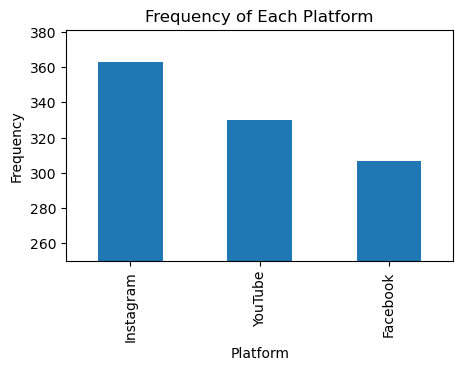

In [88]:
#find the most used platform
most_used_platform = df['platform'].value_counts()
print(most_used_platform)

plt.figure(figsize = (5, 3))
most_used_platform.plot(kind = 'bar')
plt.title('Frequency of Each Platform')
plt.xlabel('Platform')
plt.ylabel('Frequency')
plt.ylim(bottom = 250)
plt.show()

*Here is a bar chart that shows the frequency distribution between the platforms that the users say they use the most*
___

demographics
Rural        340
Sub_Urban    335
Urban        325
Name: count, dtype: int64


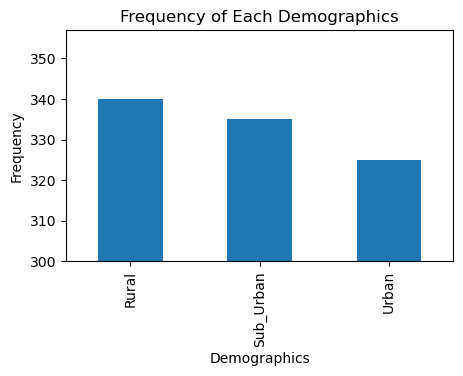

In [89]:
#finds the frequency of each demographic
most_frequent_demographics = df['demographics'].value_counts()
print(most_frequent_demographics)

plt.figure(figsize = (5, 3))
most_frequent_demographics.plot(kind = 'bar')
plt.title('Frequency of Each Demographics')
plt.xlabel('Demographics')
plt.ylabel('Frequency')
plt.ylim(bottom = 300)
plt.show()

*Here is a bar chart that shows the frequency distribution between the demographics of which people in the survey live in. You can see that the rural setting holds the most participants, and the urban setting contains the least amount of participants.*
___

demographics
Rural        5.020588
Sub_Urban    5.271642
Urban        4.787692
Name: time_spent, dtype: float64


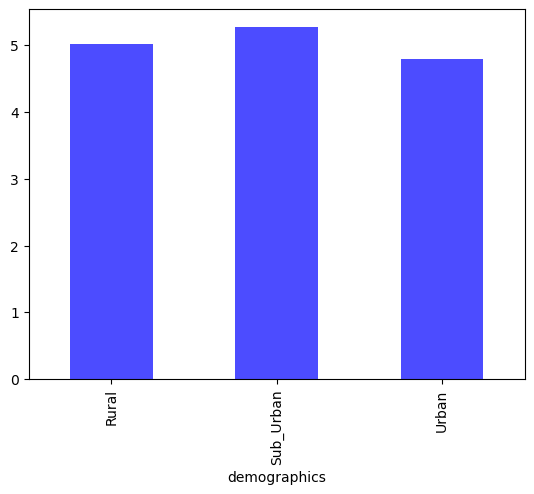

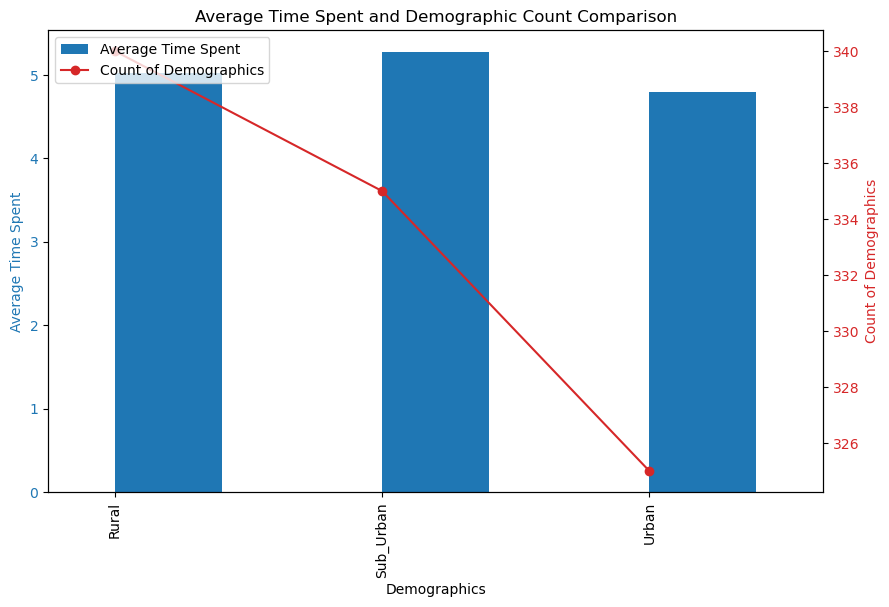

In [92]:
#display avg time spent by demographic / plot avg time and comparison between that time and the number of participants in each demographic
avg_time_spent_per_demographics = df.groupby('demographics')['time_spent'].mean()
print(avg_time_spent_per_demographics)

demo_count = df['demographics'].value_counts()

avg_time_spent_per_demographics.plot(kind = 'bar', color = 'blue', alpha = 0.7, label = 'Average Time Spent')

fig, ax1 = plt.subplots(figsize = (10,6))

color = 'tab:blue'

avg_time_spent_per_demographics.plot(kind = 'bar', color = color, ax = ax1, position = 0, width = 0.4, label = 'Average Time Spent')
ax1.set_xlabel('Demographics')
ax1.set_ylabel('Average Time Spent', color = color)
ax1.tick_params(axis = 'y', labelcolor = color)

ax2 = ax1.twinx()
color = 'tab:red'

demo_count.plot(kind = 'line', color = color, marker = 'o', ax = ax2, label = 'Count of Demographics')

ax2.set_ylabel('Count of Demographics', color = color)
ax2.tick_params(axis = 'y', labelcolor = color)

lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax2.legend(lines_1 + lines_2, labels_1 +labels_2, loc = 'upper left')

plt.title('Average Time Spent and Demographic Count Comparison')
plt.xticks(rotation = 45)
plt.show()

*Here you can see the average time spent differentiated by interest, as well as the comparison between the number of participants in each interest and that average time.*

*We can see that highest average time was from the Sub Urban demographic which also yielded the second highest number of participants*

*We can see that the second highest average time spent was from the Rurul demographic which yielded the most number of participants*

*Finally we can see that the Urban demographic had the least amount of time spent as well as the fewest number of participants*
___

interests
Lifestlye    5.143695
Sports       4.845921
Travel       5.094512
Name: time_spent, dtype: float64


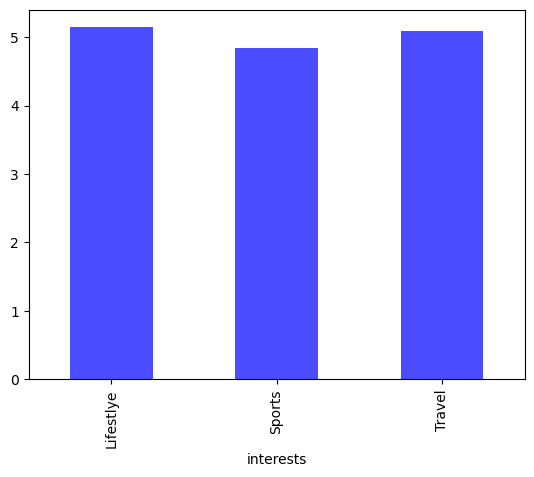

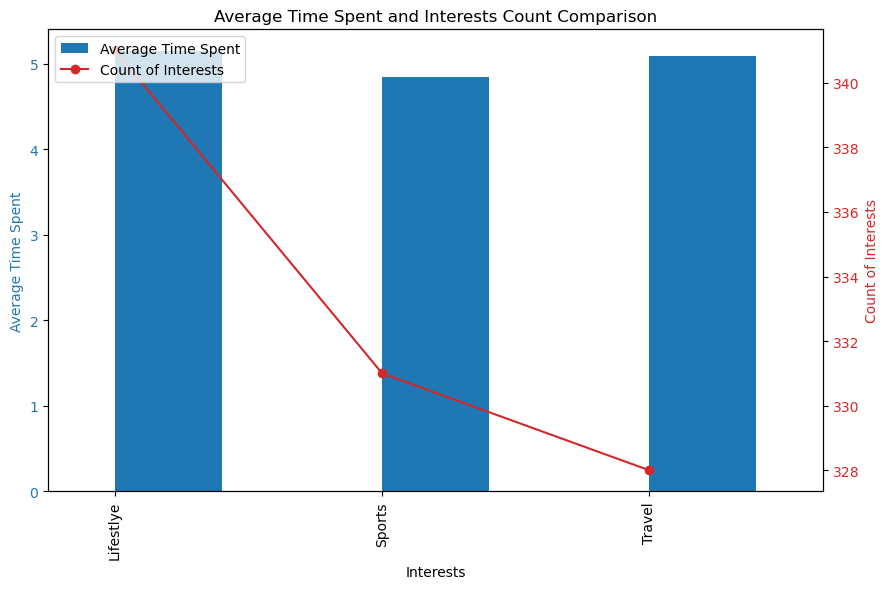

In [93]:
#display avg time spent by interest / plot avg time and comparison between that time and the number of participants in each interest
avg_time_spent_by_interest = df.groupby('interests')['time_spent'].mean()
print(avg_time_spent_by_interest)

interests_count = df['interests'].value_counts()

avg_time_spent_by_interest.plot(kind = 'bar', color = 'blue', alpha = 0.7, label = 'Average Time Spent')

fig, ax1 = plt.subplots(figsize = (10,6))

color = 'tab:blue'

avg_time_spent_by_interest.plot(kind = 'bar', color = color, ax = ax1, position = 0, width = 0.4, label = 'Average Time Spent')
ax1.set_xlabel('Interests')
ax1.set_ylabel('Average Time Spent', color = color)
ax1.tick_params(axis = 'y', labelcolor = color)

ax2 = ax1.twinx()
color = 'tab:red'

interests_count.plot(kind = 'line', color = color, marker = 'o', ax = ax2, label = 'Count of Interests')

ax2.set_ylabel('Count of Interests', color = color)
ax2.tick_params(axis = 'y', labelcolor = color)

lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax2.legend(lines_1 + lines_2, labels_1 +labels_2, loc = 'upper left')

plt.title('Average Time Spent and Interests Count Comparison')
plt.xticks(rotation = 45)
plt.show()

*Here you can see the average time spent differentiated by interest, as well as the comparison between the number of participants in each interest and that average time.*

*We can see that the lifestlye interest has the highest average time with the most participants who put lifestyle as their most used platform.*

*We can see that the sport interest has the least amount of time spent, with a medium number of participants compared to lifestyle and travel.*

*Finally we can see travel has the second highest average time with the least amount of people who said travel was their interest.*
___

In [63]:
#displays the 15 longest and shortest time spent rows information
most_time = df.nlargest(15, 'time_spent')
least_time = df.nsmallest(15, 'time_spent')

print(most_time)
print(least_time)

     age      gender  time_spent   platform  interests        location  \
14    41  non-binary           9    YouTube     Travel   United States   
18    41      female           9   Facebook     Sports   United States   
24    50  non-binary           9  Instagram     Sports  United Kingdom   
25    29  non-binary           9   Facebook     Travel       Australia   
37    54        male           9    YouTube  Lifestlye   United States   
43    21        male           9  Instagram     Travel   United States   
46    26        male           9   Facebook     Travel       Australia   
58    34        male           9  Instagram     Travel   United States   
76    25  non-binary           9  Instagram     Travel  United Kingdom   
78    40        male           9    YouTube     Sports  United Kingdom   
109   59  non-binary           9  Instagram     Sports       Australia   
116   29      female           9   Facebook  Lifestlye   United States   
120   41  non-binary           9  Inst

*Here we can see the 15 highest and 15 lowest times spent on the phone.*

*You can see that for the most time spent, there were more entries in the travel and sports columns as well as in the United States*

*As for the Lowest, there were more lifestyle usages than in the top 15, as well as more entries from Australia than US and UK.*
___